<a href="https://colab.research.google.com/github/MiguelGmz7/Inmersion-2_Models-and-Metrics/blob/main/Inmersion_2_Models_and_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Inmersion de datos CLASE 2


### Recuperamos el dataframe de google drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/Drive')
warnings.filterwarnings('ignore')

df_banco = pd.read_csv('/content/Drive/MyDrive/inmersion/resources/german_credit_clean.csv')


Mounted at /content/Drive


## Construccion de modelos


### Importar librerias

primero tendremos que importar las librerias:

- **train_test_split**: poder (entrenar y probar el modelo de machine learning)
<br></br>
- **LogisticRegression**: nos permite usar el modelo de regresion linear
<br></br>
-  **DecisionTreeClassifier**: usamos el modelo de clasificacion de arbol de desion
<br></br>
- **RandomForestClassifier**: combina muchos modelos de clasificadores de arbol para así mejorar el modelo
<br></br>
- **GaussianNB**: importa el modelo de naive-bayes para clasificacion
<br></br>
- **sklearn.metrics**: importamos metricas para medir parametros del modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


### Usar un generar el modelo

In [ ]:
x = df_banco.drop('default', axis=1)
y = df_banco['default']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# train_test_split
# - seleccionamos la muestra y la prueba de las variables x
# - seleeccionamos la muestra y la prueba de nuestra clase
# - seleccionamos que nuestros datos de prueba seran el 30% de todos nuestros datos

# - elegimos una semilla de aletoriedad (en este caso el numero 42)
# ¿Que es la semilla de aletoriedad?

# cada que corramos este modelo, tendremos siempre los mismos resultados, aunque la forma de elegir nustra muestra y testeo es aletoria

# al tener siempre la misma semilla (osea siempre eligira los mismos datos), nos dara los mismos resultados

# esto es muy util a la hora de elegir diferentes modelos



# entrenar al modelo
modelo = LogisticRegression()
modelo.fit(x_train,y_train)

# evaluar el modelo
prediccions = modelo.predict(x_test)

accuracy = accuracy_score(y_test, prediccions)

print(f'Accuracy: {accuracy}')

Accuracy: 0.7766666666666666


---
### Usar diferentes modelos


In [ ]:
def create_models():
  global df_banco, resultados

  y = df_banco['default']
  x = df_banco.drop(columns='default')

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=77)

  models = {
      'Regresion Logística': LogisticRegression(),
      'Arbol de Decision': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {
      'Model': [],
      'Accuracy':[],
      'Precision':[],
      'Recall':[],
      'F1-score': [],
      'AUC-ROC': []
  }

  for name, model in models.items():
    model.fit(x_train, y_train)

    y_predictions = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_predictions)

    precision = precision_score(y_test, y_predictions)

    recall = recall_score(y_test, y_predictions)

    f1 = f1_score(y_test, y_predictions)


    if hasattr(model, "predict_proba"):
      proba = model.predict_proba(x_test)
      roc_auc = roc_auc_score(y_test, proba[:, 1])

    else:
      roc_auc = None

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    results['AUC-ROC'].append(roc_auc)

  resultados = results




In [ ]:
create_models()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(f"Accuracy: {resultados['Accuracy'][i]}")
  print(f"Precision: {resultados['Precision'][i]}")
  print(f"Recall: {resultados['Recall'][i]}")
  print(f"F1: {resultados['F1-score'][i]}")
  print(f"AUC-ROC: {resultados['AUC-ROC'][i]}")
  print('\n')

Regresion Logística
Accuracy: 0.78
Precision: 0.6785714285714286
Recall: 0.4418604651162791
F1: 0.5352112676056338
AUC-ROC: 0.799934796783308


Arbol de Decision
Accuracy: 0.6933333333333334
Precision: 0.4625
Recall: 0.43023255813953487
F1: 0.4457831325301205
AUC-ROC: 0.6146489893501412


Random Forest
Accuracy: 0.7933333333333333
Precision: 0.7307692307692307
Recall: 0.4418604651162791
F1: 0.5507246376811594
AUC-ROC: 0.7898011301890893


Naive Bayes
Accuracy: 0.74
Precision: 0.5465116279069767
Recall: 0.5465116279069767
F1: 0.5465116279069767
AUC-ROC: 0.7800478156922409




### Evaluacion y seleccion de modelos


In [ ]:
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

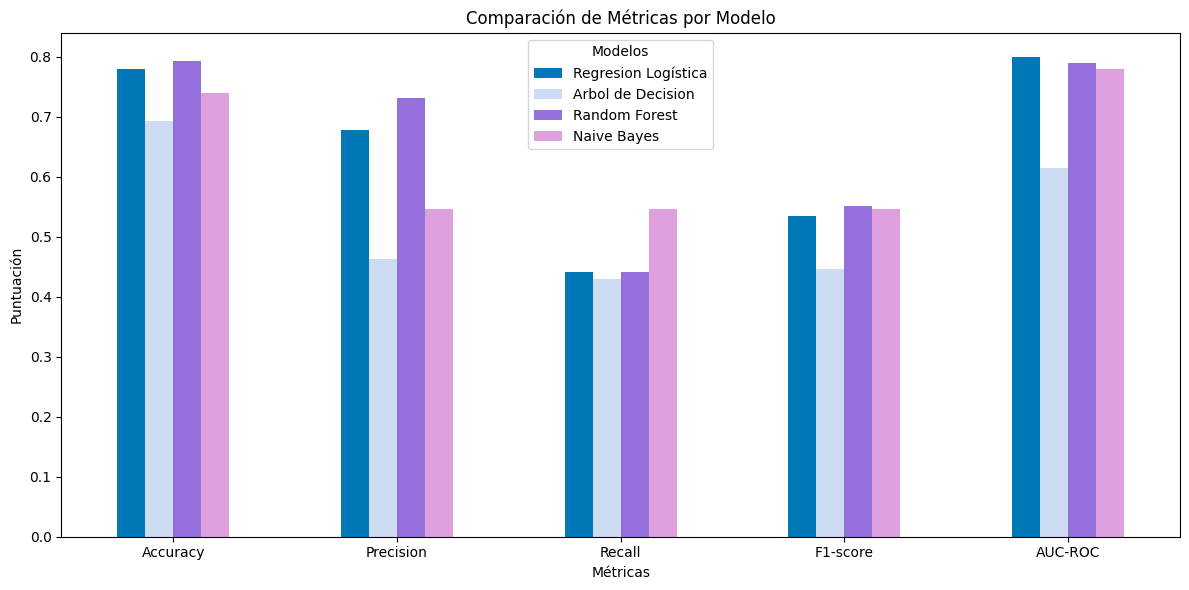

In [ ]:
visualiza_resultados()